In [2]:
# allows to bring all the functions, classes, and variables defined in the "utils" module into the current namespace.
from utils import *

# Estimating the uncertainty of noisy data

In [3]:
# generates one-dimensional data with normal noise uniformely in a given interval.

min_x, max_x, n_samples, noise = 0, 5, 300, 0.5
(
    X_train, y_train, X_test, y_test, y_mesh
) = Data_1D_hetero_noise(x_sinx, min_x, max_x, n_samples, noise)

print(X_train.shape,X_test.shape )

(300, 1) (1500, 1)


findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.


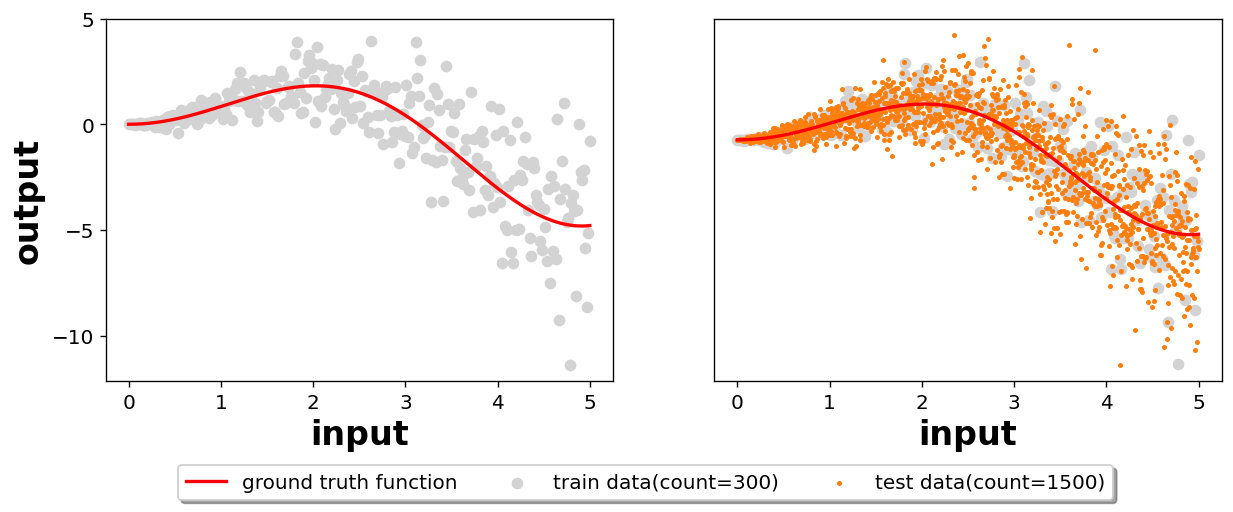

In [4]:
fig,ax=plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(X_train, y_train, c="lightgray",label='train data(count=%s)'%X_train.shape[0])
ax[0].plot(X_test, y_mesh, c="red", label='ground truth function') #$function: x * sin(x)$
ax[0].set_xlabel("input",fontweight ='bold',fontsize=20)
ax[0].set_ylabel("output",fontweight ='bold',fontsize=20)
ax[0].set_yticks([-10,-5,0,5])
ax[0].set_xticks([0,1,2,3,4,5])

ax[1].scatter(X_train, y_train, c="lightgray")#,label='train data(count=%s)'%X_train.shape[0]
ax[1].scatter(X_test, y_test, c="C1", s=4,label='test data(count=%s)'%X_test.shape[0])
ax[1].plot(X_test, y_mesh, c="red")
ax[1].set_xlabel("input",fontweight ='bold',fontsize=20)
ax[1].set_yticks([])
ax[1].set_xticks([0,1,2,3,4,5])
fig.legend( loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=6,fontsize=12, borderaxespad=0.)
plt.show()

In [5]:
# Scaling Transform using StandardScaler to standardize the features
scaler = StandardScaler()

# PolynomialTransform using PolynomialFeatures to create polynomial features from the original features
poly = PolynomialFeatures()

# Polynomial Ridge Regression model using Ridge regression for polynomial regression with regularization
reg = Ridge()

# Creating a pipeline for the Polynomial Ridge Regression model with scaler, poly, and reg as steps
polyn_model = Pipeline([("scaler", scaler), ("poly", poly), ("reg", reg)])

# Hyperparameter Optimization
# Defining the hyperparameter grid for Polynomial Ridge Regression
param_grid = [
    {
        "poly__degree": [2, 3, 4, 5, 6, 7, 8, 9, 10],  # Degree of polynomial features to consider
        "reg__alpha": np.logspace(-3, 3, 7),  # Range of alpha values for Ridge regularization
    },
]

# Models for hyperparameter optimization, in this case, only polyn_model is considered
models = [polyn_model]
names = ['polyn_model'] 

# Dictionary to store the best hyperparameters for each model
search_bestparams = {}

# Hyperparameter optimization using GridSearchCV for each model
for i, (name, model) in enumerate(zip(names, models)):
    search = GridSearchCV(model, param_grid[i], cv=5, scoring='explained_variance')
    search.fit(X_train, y_train)
    best_params = search.best_params_
    search_bestparams[name] = best_params

# Reconstructing the polynomial regression model with the optimized hyperparameters
# Extracting the optimized hyperparameters for polyn_model
poly_degree = search_bestparams['polyn_model']['poly__degree']
alpha = search_bestparams['polyn_model']['reg__alpha']

# Rebuilding the polyn_model with the optimized hyperparameters
polyn_model = Pipeline([("scaler", scaler), ("poly", PolynomialFeatures(degree=poly_degree)), 
                        ("reg", Ridge(alpha=alpha))])


best parameters: {'polyn_model': {'poly__degree': 4, 'reg__alpha': 0.1}}


The code is performing a comparative evaluation of different regression strategies (jackknife, jackknife_plus, weighted_jackknife_plus, CV, CV_plus, weighted_CV_plus) at different confidence levels (90%, 95%, 99%). The results dictionary stores the output of each strategy at different confidence levels, allowing for easy comparison and analysis.

In [7]:
# List of confidence levels to be evaluated (90%, 95%, 99%)
levels = [0.1, 0.05, 0.01]

# List of functions to be evaluated, each corresponding to different regression strategies
# jackknife, jackknife_plus, weighted_jackknife_plus, CV, CV_plus, weighted_CV_plus
funcs = [jackknife, jackknife_plus, weighted_jackknife_plus, CV, CV_plus, weighted_CV_plus]

# List of names corresponding to the regression strategies for better identification in results
names = ['J', 'J+', 'WJ+', 'CV', 'CV+', 'WCV+']

# Dictionary to store the results of each regression strategy at different confidence levels
results = {}

# Loop through each regression strategy and compute the results at different confidence levels
for name, func in zip(names, funcs):
    res = []
    for level in levels:
        result = func(X_train, y_train, X_test, y_test, alpha=level)
        res.append(result)
    results[name] = res

# The 'results' dictionary contains the computed results for each regression strategy
# and the corresponding confidence levels


{'J': [[[0.1,
    0.903,
    4.913,
    array([[-2.40966812,  2.50305124],
           [-2.41185432,  2.50086505],
           [-2.41398566,  2.49873371],
           ...,
           [-6.67530537, -1.762586  ],
           [-6.67222234, -1.75950297],
           [-6.66905777, -1.7563384 ]])]],
  [[0.05,
    0.953,
    6.879,
    array([[-3.39257453,  3.48595765],
           [-3.39476072,  3.48377146],
           [-3.39689207,  3.48164012],
           ...,
           [-7.65821178, -0.77967959],
           [-7.65512874, -0.77659656],
           [-7.65196418, -0.773432  ]])]],
  [[0.01,
    0.994,
    10.698,
    array([[-5.30245012,  5.39583324],
           [-5.30463631,  5.39364705],
           [-5.30676766,  5.39151571],
           ...,
           [-9.56808737,  1.130196  ],
           [-9.56500433,  1.13327903],
           [-9.56183977,  1.13644359]])]]],
 'J+': [[[0.1,
    0.901,
    4.913,
    array([[-2.41381335,  2.49890602],
           [-2.41589823,  2.49682114],
           [-2.417929

The code creates a 2x3 subplot figure to compare different regression strategies (J, J+, WJ+, CV, CV+, WCV+) with their corresponding output predictions. The fontsize for the axes and ticks is customized, and the legend is added at the top center of the figure for better readability. The y-axis labels are set for the top row of subplots, and the x-axis labels are set for the bottom row of subplots. The resulting plot displays the outputs and prediction intervals for each regression strategy.

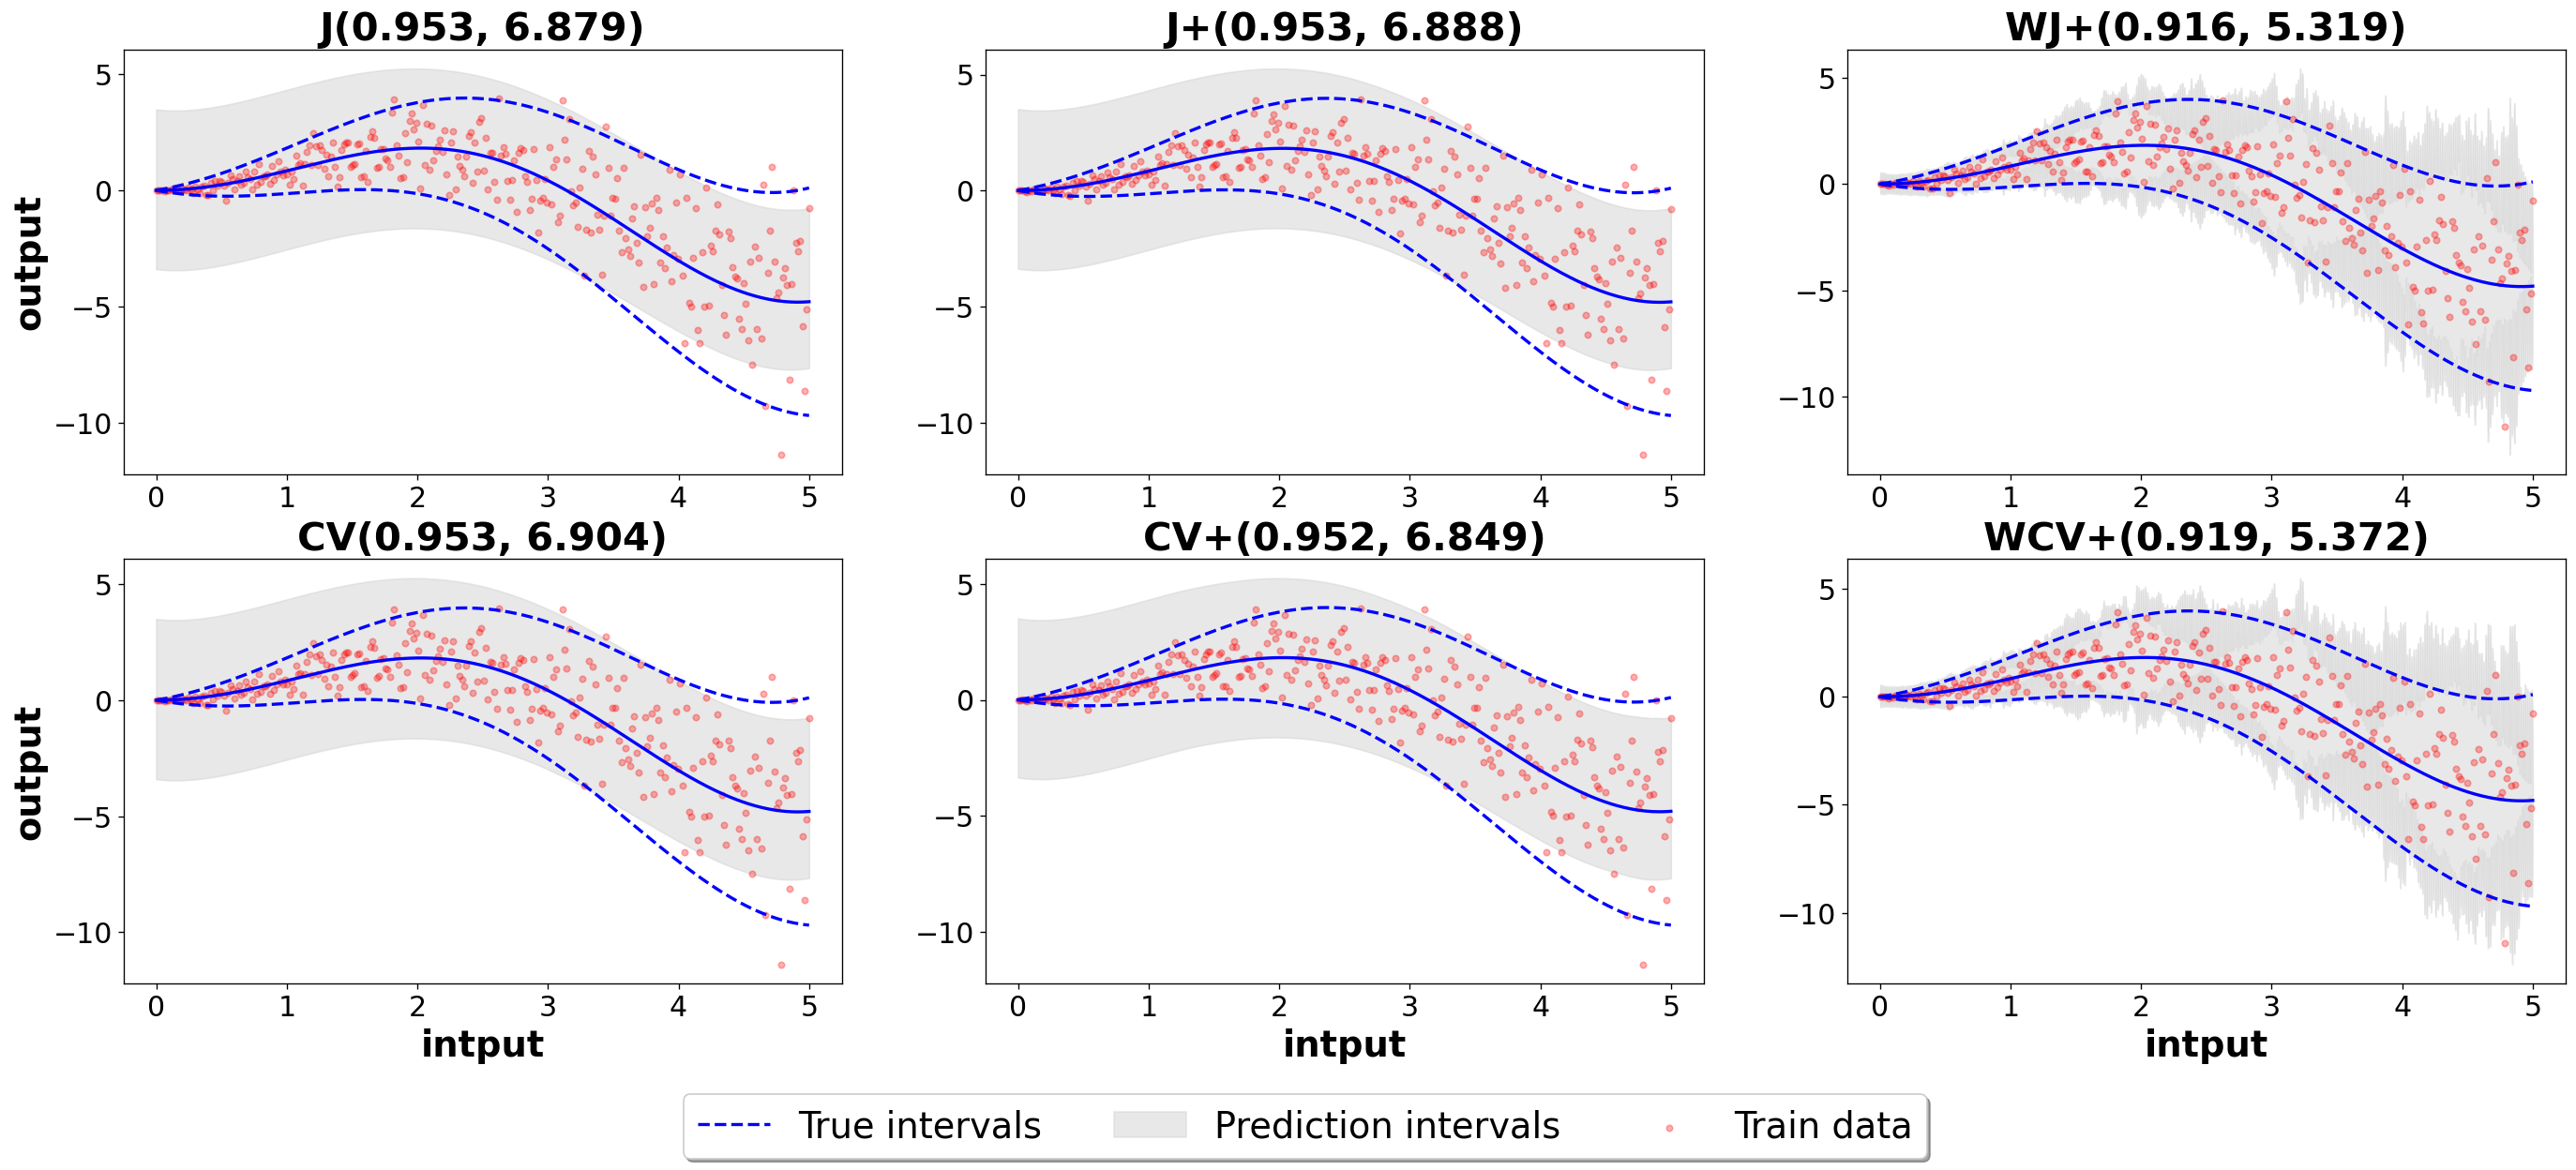

In [59]:
# List of CP strategy names
names = ['J', 'J+', 'WJ+', 'CV', 'CV+', 'WCV+']

# Create a 2x3 subplot figure with custom size
fig, axs = plt.subplots(2, 3, figsize=(28, 11))

# Flatten the axs array for easier indexing
coords = axs.flatten()

# Loop through each regression strategy and corresponding subplot
for i, (name, coord) in enumerate(zip(names, coords)):
    # Plot the data for the current regression strategy
    plot(
        X_train.ravel(),
        y_train.ravel(),
        X_test.ravel(),
        y_mesh.ravel(),  # mesh
        (1.96 * noise * X_test).ravel(),  # noise
        (results[name][1][0][3]).mean(axis=1).ravel(),  # y_pred
        results[name][1][0][3][:, 0].ravel(),  # y_pred_low
        results[name][1][0][3][:, 1].ravel(),  # y_pred_up
        ax=coord,
        title=name + f" ({results[name][1][0][1]}, {results[name][1][0][2]})"
    )

# Get legend handles and labels from the first subplot
lines, labels = fig.axes[0].get_legend_handles_labels()

# Add the legend at the top center of the figure
fig.legend(
    lines,
    labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.05),
    fancybox=True,
    shadow=True,
    ncol=5,
    fontsize=23,
)

# Set y-axis label for the top row of subplots
fig.axes[0].set_ylabel("output", fontweight='bold', fontsize=23)
fig.axes[3].set_ylabel("output", fontweight='bold', fontsize=23)

# Set x-axis label for the bottom row of subplots
fig.axes[3].set_xlabel("input", fontweight='bold', fontsize=23)
fig.axes[4].set_xlabel("input", fontweight='bold', fontsize=23)
fig.axes[5].set_xlabel("input", fontweight='bold', fontsize=23)

# Show the plot
plt.show()

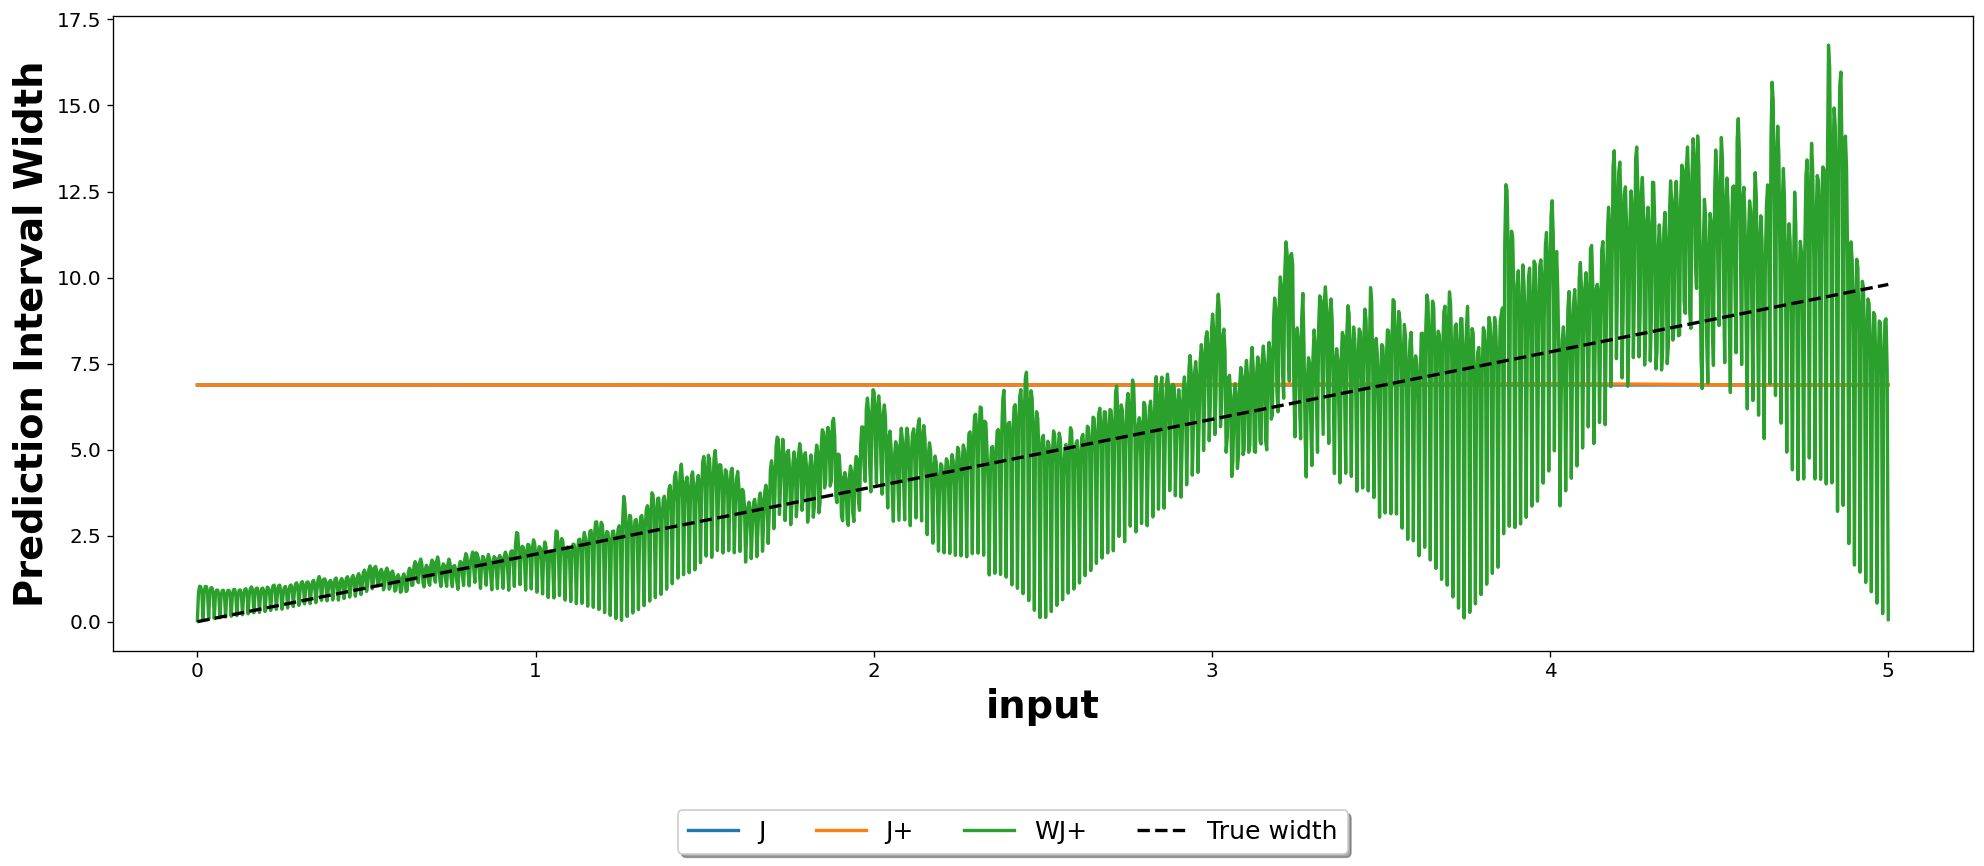

In [9]:
# Width figure
names = ['J', 'J+', 'WJ+']  # WJ+', 'WCV+'
fig, ax = plt.subplots(1, 1, figsize=(20, 7))

# Plot prediction interval width for each regression strategy
for name in names:
    ax.plot(X_test, results[name][1][0][3][:, 1] - results[name][1][0][3][:, 0], label=name)

# Plot the true width of prediction intervals (1.96 * 2 * noise * X_test)
ax.plot(X_test, 1.96 * 2 * noise * X_test, ls="--", color="k", label="True width")

# Set x and y-axis labels
ax.set_xlabel("input", fontweight='bold', fontsize=23)
ax.set_ylabel("Prediction Interval Width", fontweight='bold', fontsize=23)

# Get legend handles and labels from the first subplot
lines, labels = fig.axes[0].get_legend_handles_labels()

# Add the legend at the upper center of the figure
fig.legend(
    lines,
    labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),
    fancybox=True,
    shadow=True,
    ncol=5,
    fontsize=15,
)

# Show the plot
plt.show()


The code calculates and visualizes the conditional coverage and prediction interval width for different regression strategies (J, J+, WJ+, CV, CV+, WCV+). Two bar plots are created: one for conditional coverage and another for prediction interval width. The first plot shows how well each strategy achieves the 95% coverage level (indicated by the dashed line), while the second plot shows the width of prediction intervals for different input bins. Legends are removed to improve the visual clarity, and a new legend is added at the bottom of the second plot for better readability.

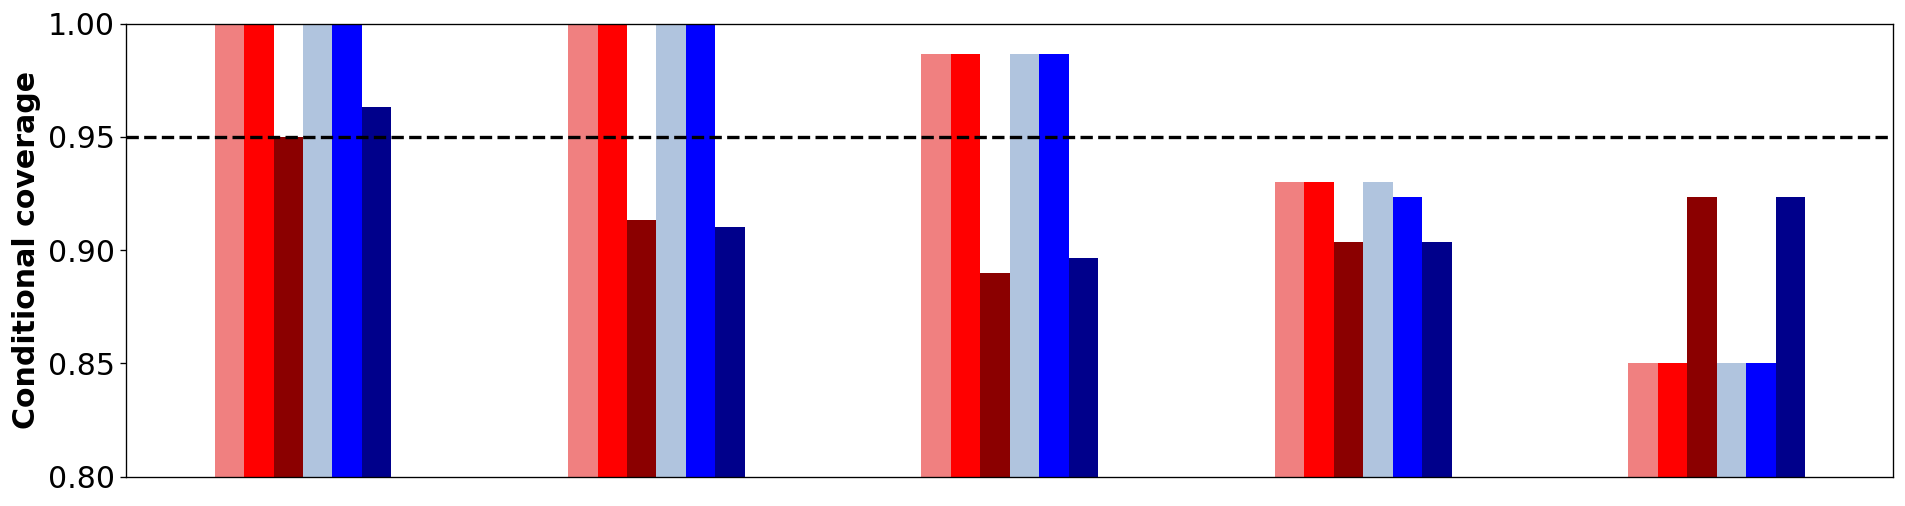

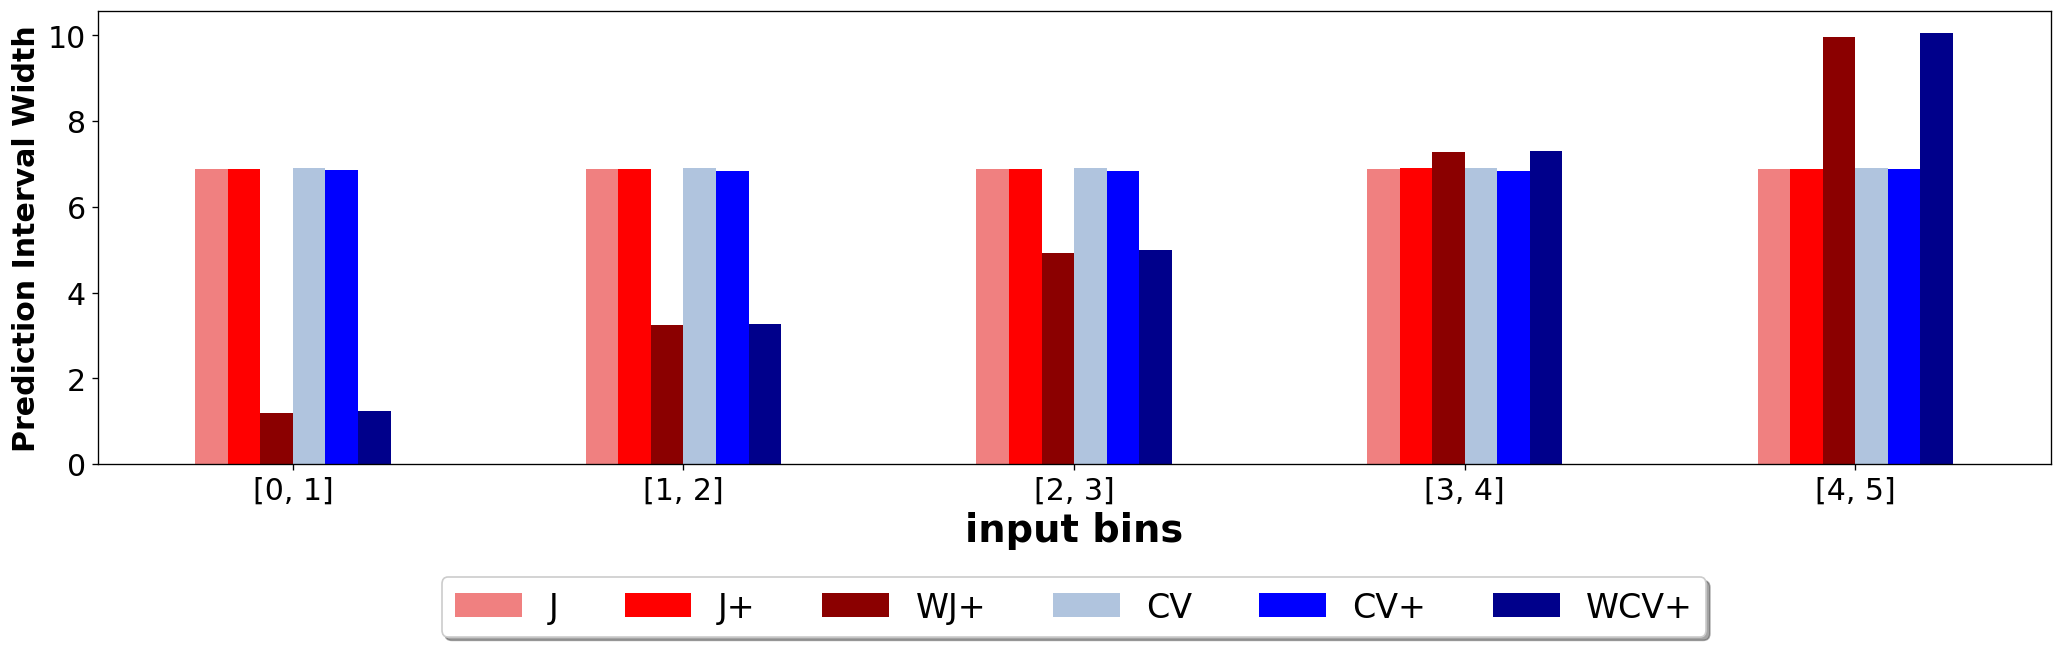

In [70]:
names = ['J', 'J+', 'WJ+', 'CV', 'CV+', 'WCV+']

# Function to calculate conditional coverage
def get_heteroscedastic_coverage(y_test, results, names, bins):
    recap = {}
    for i in range(len(bins) - 1):
        bin1, bin2 = bins[i], bins[i + 1]
        name = f"[{bin1}, {bin2}]"
        recap[name] = []
        for strategy in names:
            indices = np.where((X_test >= bins[i]) * (X_test <= bins[i + 1]))
            y_test_trunc = np.take(y_test, indices)
            y_low_ = np.take(results[strategy][1][0][3][:, 0], indices)
            y_high_ = np.take(results[strategy][1][0][3][:, 1], indices)
            score_coverage = regression_coverage_score(y_test_trunc[0], y_low_[0], y_high_[0])
            recap[name].append(score_coverage)
    recap_df = pd.DataFrame(recap, index=names)
    return recap_df

bins = [0, 1, 2, 3, 4, 5]

# Calculate conditional coverage for different regression strategies
het_cov = get_heteroscedastic_coverage(y_test, results, names, bins)

# Plot conditional coverage as a bar chart
het_cov.T.plot.bar(figsize=(19, 5), color=['lightcoral', 'r', 'darkred', 'lightsteelblue', 'b', 'darkblue'])
plt.axhline(0.95, ls="--", color="k")  # Add a dashed line at the 95% coverage level
plt.ylabel("Conditional coverage", fontweight='bold', fontsize=18)
plt.xticks([])  # Remove x-axis tick labels
plt.ylim(0.8, 1.0)
legend = plt.legend(handles=[], labels=[])  # Remove the legend
legend.remove()

plt.show()

# Calculate and plot prediction interval width for different regression strategies
het_cov = get_heteroscedastic_coverage(y_test, results, names, bins)

het_cov.T.plot.bar(figsize=(21, 5), color=['lightcoral', 'r', 'darkred', 'lightsteelblue', 'b', 'darkblue'])
plt.ylabel("Prediction Interval Width", fontweight='bold', fontsize=18)
plt.xlabel("Input bins", fontweight='bold', fontsize=23)
plt.xticks(rotation=0, fontsize=18)
legend = plt.legend(handles=[], labels=[])  # Remove the legend
legend.remove()

# Add a new legend at the bottom of the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=6, fontsize=20,
           borderaxespad=0.)

plt.show()
